<h2>The heat diffusion equation in spherical coordinates</h2>

*Or how much longer does a turkey take to cook than a chicken?*


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.size']=18
from turkey_chicken import build_matrix, forward_euler

## Set the parameters

In [2]:
## These are the user set values
params = {'r_max':0.1,#radius of the sphere
          'n_r':101,#number of points in r
          't_max':36000,#final time
          'n_t':36001,#number of time-steps
          'T_r':200,#boundary condition for temperature
          'sphere':True,#sphere if true, cylinder if false
          'k':0.6,#thermal conductivity (W/m/K)
          'rho':1e3,#density (kg/m3)
          'c':4200} #specific heat capacity (J/kg/K)

## The matrix generation and time-stepping functions

In [3]:
T_lists = []

for r_max in [0.1,0.2]:
    params['r_max'] = r_max
    ## The derived parameters are below
    dt =params['t_max'] /params['n_t']
    dr = params['r_max']/(params['n_r']-1)
    D = params['k']/params['rho']/params['c']
    s = D*dt/dr**2
    print('Diffusivity =','{:.3e}'.format(D),'m2/s')
    print('s =','{:.3f}'.format(s))

    A = build_matrix(params['n_r'],s,params['T_r'],params['sphere'])
    T_in = [0 for ii in range(params['n_r']-1)]
    T_in.append(params['T_r'])        
    T_list = forward_euler(T_in,params['n_t'],A)
    T_lists.append(T_list)

Diffusivity = 1.429e-07 m2/s
s = 0.143
Diffusivity = 1.429e-07 m2/s
s = 0.036


## Test the code

Before we can analyse the two cases we better test the code. Carslaw and Jaeger gives us the analytic solution for the problem: a sphere (radius, $a$) with the initial condition of constant (here zero) internal temperature and the temperature at the surface set to a constant, different, value ($T_r$). The constant D is the thermal diffusivity material comprising the sphere.

\begin{equation}
T_{an}(r,t) = T_r + \frac{2aT_r}{\pi r}\sum_{n=1}^\infty \frac{(-1)^n}{n}sin(\frac{n\pi r}{a})exp(-D n^2 \pi^2 t /a^2)
\end{equation}

Argueably, we didn't need to numerically solve the PDE at all, but it is always nice to be able to check a solution with two methods. 

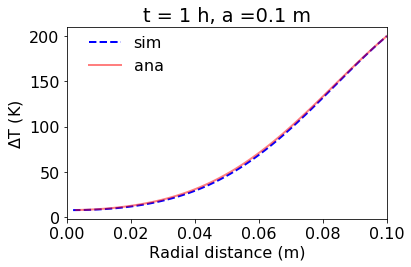

In [4]:
r_max = 0.1
r_vals = np.linspace(dr,r_max,params['n_r'])
time = 3600


def T_an(t,r_max,D,T_r,n_r,dr):
    r_vals = np.linspace(dr,r_max,n_r)
    T_out = np.zeros(n_r-1)
    T_out[:] = T_r
    for i in range(1,100):
        T_out += 2*r_max*T_r/np.pi/r_vals[1:]*(-1)**i/i*np.sin(np.pi*i*r_vals[1:]/r_max)* \
        np.exp(-D*i**2*np.pi**2*t/r_max**2)
    return T_out

fig,ax = plt.subplots(1,1,figsize=[6,4])
ax.set_ylabel('$\Delta$T (K)')
ax.set_xlabel('Radial distance (m)')
ax.set_xlim([0,0.1])

T_out = T_an(time,r_max,D,params['T_r'],params['n_r'],dr)
ax.plot(r_vals,T_lists[0][time],'--',linewidth=2,alpha = 1,color='b',label='sim')
ax.plot(r_vals[1:],T_out,linewidth=2,alpha = 0.5,color='r',label='ana')
ax.set_title('t = ' + str(time//3600)+' h, a =' + str(r_max) + ' m')
fig.legend(frameon=False,loc=[0.2,0.7])
fig.tight_layout()
fig.savefig('comparison_sim_ana.png',dpi=300)

## The temperature curves as a function of time

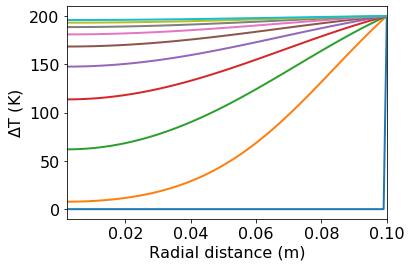

In [5]:
fig,ax=plt.subplots(1,1,figsize=[6,4])
for k in range (params['t_max']//3600):
    ax.plot(r_vals, T_lists[0][k*3600],linewidth=2)
ax.set_ylabel('$\Delta$T (K)')
ax.set_xlabel('Radial distance (m)')
ax.set_xlim([r_vals[0],r_vals[-1]])
fig.tight_layout()
fig.savefig('10cm_sphere_traces_1000s_apart.png',dpi=300)

## The centre temperature as a function of time

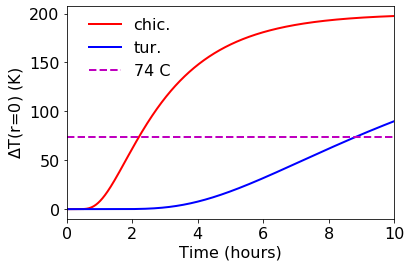

In [6]:
t_vals = [i*dt for i in range(params['n_t'])]
fig,ax=plt.subplots(1,1,figsize=[6,4])

chicken = []
turkey = []
for j in range(params['n_t']):
    chicken.append(T_lists[0][j][0])
    turkey.append(T_lists[1][j][0])
ax.plot(np.array(t_vals)/3600, chicken,linewidth=2,color='r',label = 'chic.')
ax.plot(np.array(t_vals)/3600, turkey,linewidth=2,color='b',label = 'tur.')
ax.plot([0,10],[74,74],'--',linewidth=2,color='m',label = '74 C')
ax.set_xlim([0,10])
ax.set_ylabel('$\Delta$T(r=0) (K)')
ax.set_xlabel('Time (hours)')
fig.legend(frameon=False,loc=[0.2,0.68])
fig.tight_layout()

fig.savefig('turkey_chicken.png',dpi=300)

## Featured image

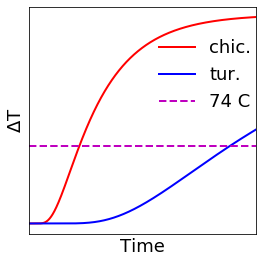

In [18]:
t_vals = [i*dt for i in range(params['n_t'])]
fig,ax=plt.subplots(1,1,figsize=[4,4])

chicken = []
turkey = []
for j in range(params['n_t']):
    chicken.append(T_lists[0][j][0])
    turkey.append(T_lists[1][j][0])
ax.plot(np.array(t_vals)/3600, chicken,linewidth=2,color='r',label = 'chic.')
ax.plot(np.array(t_vals)/3600, turkey,linewidth=2,color='b',label = 'tur.')
ax.plot([0,10],[74,74],'--',linewidth=2,color='m',label = '74 C')
ax.set_xlim([0,10])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('$\Delta$T')
ax.set_xlabel('Time')
fig.legend(frameon=False,loc=[0.57,0.55])
fig.tight_layout()

fig.savefig('turkey_chicken_feat.png',dpi=150)